In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans , DBSCAN
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
data=pd.read_excel("sales_data.xlsx")

In [ ]:
data.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

In [ ]:
data.describe()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40709.227800,12.87040,1681.523840,136.537378,46.036376,3.592574,163.159618,87.420000,1.629000,1.75440,...,421.826908,474.462852,1.028800,3.746200,4.434000,3.661400,131.062636,486.863868,584.731626,478.865710
std,49949.848017,12.67988,1998.618678,91.651569,47.879226,2.021360,259.699496,80.156513,2.236506,2.43394,...,643.449120,617.579321,2.174331,4.700234,5.044793,4.581894,331.289349,789.029911,804.290026,743.244248
min,1.000000,1.00000,38.500000,10.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1687.500000,3.00000,315.097500,83.025000,9.980000,2.500000,21.670000,7.000000,0.000000,0.00000,...,0.000000,80.000000,0.000000,1.000000,1.000000,1.000000,0.000000,35.000000,89.990000,1.000000
50%,13765.000000,8.00000,966.725000,113.160000,24.985000,3.660000,57.635000,68.000000,1.000000,1.00000,...,194.990000,264.485000,0.000000,2.000000,3.000000,2.000000,0.000000,236.440000,299.840000,208.990000
75%,71891.500000,20.00000,2493.072500,160.272500,76.862500,4.790000,170.357500,171.250000,2.000000,3.00000,...,604.085000,651.487500,1.000000,6.000000,7.000000,5.000000,131.282500,661.952500,797.032500,620.117500
max,277160.000000,156.00000,34847.400000,1578.880000,529.590000,35.990000,1409.500000,207.000000,19.000000,23.00000,...,12946.220000,8274.970000,34.000000,61.000000,58.000000,64.000000,7700.240000,23832.770000,17749.010000,12995.020000


In [ ]:
data['FIRST_ORDER_DATE']=data['FIRST_ORDER_DATE'].astype('datetime64[s]')
data['LATEST_ORDER_DATE']=data['LATEST_ORDER_DATE'].astype('datetime64[s]')

**RFM_MODEL**
**RECENCY**

In [ ]:
data_recency = data.groupby(by='CustomerID',
                        as_index=False)['FIRST_ORDER_DATE'].max()
data_recency.columns = ['CustomerID', 'LATEST_ORDER_DATE']
recent_date = data_recency['LATEST_ORDER_DATE'].max()
data_recency['Recency'] = data_recency['LATEST_ORDER_DATE'].apply(
    lambda x: (recent_date - x).days)
data_recency.head()

,CustomerID,LATEST_ORDER_DATE,Recency
0,1,2020-03-03,600
1,2,2019-02-13,984
2,3,2018-02-15,1347
3,4,2016-10-01,1849
4,5,2015-12-27,2128


**Frequency**

In [ ]:
frequency_data = data.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['FIRST_ORDER_DATE'].count()
frequency_data.columns = ['CustomerID', 'Frequency']
frequency_data

,CustomerID,Frequency
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
4995,248709,1
4996,248710,1
4997,259042,1
4998,266024,1


**Monetary**

In [ ]:
data['Total'] = data['TOTAL_ORDERS']*data['REVENUE']
monetary_data = data.groupby(by='CustomerID', as_index=False)['Total'].sum()
monetary_data.columns = ['CustomerID', 'Monetary']
monetary_data.head()

,CustomerID,Monetary
0,1,2125691.40
1,2,1916731.82
2,3,1281485.41
3,4,1558577.16
4,5,439009.74


In [ ]:
rf_data = data_recency.merge(frequency_data, on='CustomerID')
rfm_data = rf_data.merge(monetary_data, on='CustomerID').drop(
    columns='LATEST_ORDER_DATE')
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary
0,1,600,1,2125691.40
1,2,984,1,1916731.82
2,3,1347,1,1281485.41
3,4,1849,1,1558577.16
4,5,2128,1,439009.74


**Ranking Customer’s based upon their recency, frequency, and monetary score**

In [ ]:
rfm_data['R_rank'] = rfm_data['Recency'].rank(ascending=False)
rfm_data['F_rank'] = rfm_data['Frequency'].rank(ascending=True)
rfm_data['M_rank'] = rfm_data['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_data['R_rank_norm'] = (rfm_data['R_rank']/rfm_data['R_rank'].max())*100
rfm_data['F_rank_norm'] = (rfm_data['F_rank']/rfm_data['F_rank'].max())*100
rfm_data['M_rank_norm'] = (rfm_data['F_rank']/rfm_data['M_rank'].max())*100
 
rfm_data.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1,600,1,2125691.40,59.032225,100.0,50.01
1,2,984,1,1916731.82,47.168852,100.0,50.01
2,3,1347,1,1281485.41,37.287791,100.0,50.01
3,4,1849,1,1558577.16,27.030599,100.0,50.01
4,5,2128,1,439009.74,24.357019,100.0,50.01


**Calculating RFM score**

In [ ]:
rfm_data['RFM_Score'] = 0.15*rfm_data['R_rank_norm']+0.28 * \
    rfm_data['F_rank_norm']+0.57*rfm_data['M_rank_norm']
rfm_data['RFM_Score'] *= 0.05
rfm_data = rfm_data.round(2)
rfm_data[['CustomerID', 'RFM_Score']].head(10)

,CustomerID,RFM_Score
0,1,3.27
1,2,3.18
2,3,3.10
3,4,3.03
4,5,3.01
5,6,2.98
6,7,3.06
7,8,3.12
8,9,3.02
9,10,3.17


**Rating Customer based upon the RFM score**

In [ ]:
rfm_data["Customer_segment"] = np.where(rfm_data['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_data['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_data['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_data['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_data[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerID,RFM_Score,Customer_segment
0,1,3.27,Medium Value Customer
1,2,3.18,Medium Value Customer
2,3,3.10,Medium Value Customer
3,4,3.03,Medium Value Customer
4,5,3.01,Medium Value Customer
5,6,2.98,Low Value Customers
6,7,3.06,Medium Value Customer
7,8,3.12,Medium Value Customer
8,9,3.02,Medium Value Customer
9,10,3.17,Medium Value Customer


**Visualizing the customer segments**

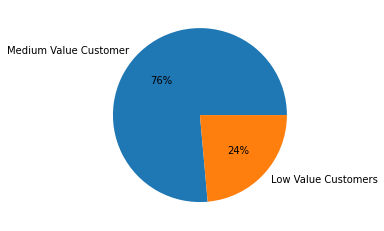

In [ ]:
plt.pie(rfm_data.Customer_segment.value_counts(),
        labels=rfm_data.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
wcss = []
for i in range(1,20):
    kmean = KMeans(n_clusters = i, init = 'k-means++' , random_state= 30)
    kmean.fit(data[['REVENUE' , 'TOTAL_ORDERS']])
    wcss.append(kmean.inertia_)

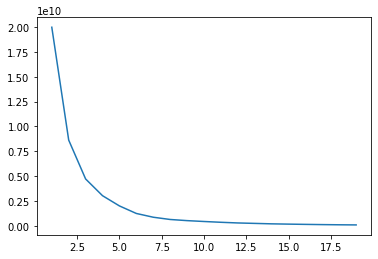

In [ ]:
plt.plot(range(1,20) , wcss)

In [ ]:
kmean = KMeans(n_clusters= 3 , init='k-means++' , random_state= 30)

In [ ]:
kmean

KMeans(n_clusters=3, random_state=30)

In [ ]:
Cluster = kmean.fit_predict(data[['REVENUE' , 'TOTAL_ORDERS']])

In [ ]:
Cluster

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
data['CLUSTER_number'] = Cluster
data.CLUSTER_number.unique()

array([2, 1, 0], dtype=int32)

In [ ]:
df1 = data[['REVENUE' , 'TOTAL_ORDERS']].values

In [ ]:
df1

array([[1.198654e+04, 1.240000e+02],
       [1.102596e+04, 8.200000e+01],
       [7.259690e+03, 4.300000e+01],
       ...,
       [1.174900e+02, 1.000000e+00],
       [1.174900e+02, 1.000000e+00],
       [9.414000e+01, 2.000000e+00]])

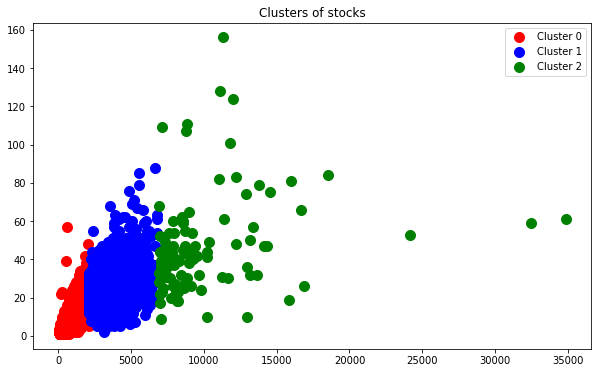

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df1[Cluster== 0, 0], df1[Cluster == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(df1[Cluster == 1, 0], df1[Cluster == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(df1[Cluster == 2, 0], df1[Cluster == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.title('Clusters of stocks')
plt.legend()
plt.show()

In [ ]:
print(f'Revenues for cluster 0 , MAX : {data[data.CLUSTER_number == 0].max().REVENUE} , MIN: {data[data.CLUSTER_number == 0].min().REVENUE}')
print(f'Revenues for cluster 1 , MAX : {data[data.CLUSTER_number == 1].max().REVENUE} , MIN: {data[data.CLUSTER_number == 1].min().REVENUE}')
print(f'Revenues for cluster 2 , MAX : {data[data.CLUSTER_number == 2].max().REVENUE} , MIN: {data[data.CLUSTER_number == 2].min().REVENUE}')

Revenues for cluster 0 , MAX : 2113.44 , MIN: 38.5
Revenues for cluster 1 , MAX : 6821.37 , MIN: 2114.41
Revenues for cluster 2 , MAX : 34847.4 , MIN: 6911.51


**From the above info we can see the clusters are properly divided on the basis of revenue generated
**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Average Reveue based on the cluster number')

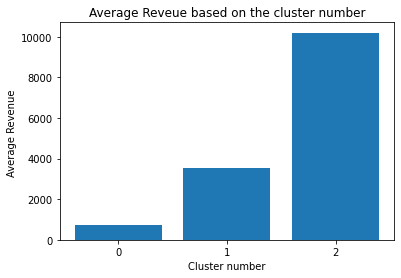

In [ ]:
y = [data[data.CLUSTER_number == 0].mean().REVENUE,data[data.CLUSTER_number == 1].mean().REVENUE,data[data.CLUSTER_number ==2].mean().REVENUE ]
x = ['0','1','2']
plt.bar(x, y )
plt.xlabel("Cluster number")
plt.ylabel("Average Revenue ")
plt.title('Average Reveue based on the cluster number')

In [ ]:
AVG = data[['CLUSTER_number' , 'CustomerID' , 'DAYSSINCELASTORDER']]

In [ ]:
AVG_Cluster2 = AVG[AVG.CLUSTER_number==2]
AVG_Cluster1 = AVG[AVG.CLUSTER_number==1]     
AVG_Cluster0 = AVG[AVG.CLUSTER_number==0]

In [ ]:
Champions_1 =AVG_Cluster2[AVG_Cluster2.DAYSSINCELASTORDER <=30] 
len(Champions_1)

40

In [ ]:
Potential_1 = AVG_Cluster2[(AVG_Cluster2.DAYSSINCELASTORDER >30) & (AVG_Cluster2.DAYSSINCELASTORDER <=60)] 
len(Potential_1)

15

In [ ]:
Attention_1=AVG_Cluster2[AVG_Cluster2.DAYSSINCELASTORDER >60] 
len(Attention_1)

45

In [ ]:
Champions_2 = AVG_Cluster1[AVG_Cluster1.DAYSSINCELASTORDER <=15]
len(Champions_2)

344

In [ ]:
Potential_2 = AVG_Cluster1[(AVG_Cluster1.DAYSSINCELASTORDER >15) & (AVG_Cluster1.DAYSSINCELASTORDER <=40)] 
len(Potential_2)

281

In [ ]:
Attention_2 = AVG_Cluster1[AVG_Cluster1.DAYSSINCELASTORDER >40] 
len(Attention_2)

767

In [ ]:
Potential_3=AVG_Cluster0[AVG_Cluster0.DAYSSINCELASTORDER <=20] 
len(Potential_3)

1240

In [ ]:
Attention_3 =AVG_Cluster0[AVG_Cluster0.DAYSSINCELASTORDER >20] 
len(Attention_3)

2268

**Creating dataframe base on champion , potential and attention customers**

In [ ]:
CP = [Champions_1,Champions_2]
Champions = pd.concat(CP)  #creating a seprate dataframe for champions
PT = [Potential_1 , Potential_2 , Potential_3]
Potential_customers = pd.concat(PT) #creating a seprate dataframe for potential customers
AT = [Attention_1 ,Attention_2 , Attention_3]
Attention = pd.concat(AT) #creatina a seprate dataframe for need attention customer

In [ ]:
Champions

,CLUSTER_number,CustomerID,DAYSSINCELASTORDER
0,2,22,1
1,2,29,1
2,2,83,1
3,2,95,1
1030,2,41,2
...,...,...,...
1554,1,939,15
1555,1,994,15
1556,1,1233,15
1557,1,1563,15


In [ ]:
Potential_customers

,CLUSTER_number,CustomerID,DAYSSINCELASTORDER
1899,2,94,31
1929,2,6,32
1968,2,92,34
1987,2,19,35
2060,2,58,39
...,...,...,...
1672,0,9651,20
1673,0,17148,20
1674,0,19685,20
1675,0,76063,20


In [ ]:
Attention

,CLUSTER_number,CustomerID,DAYSSINCELASTORDER
2399,2,8,62
2426,2,71,64
2576,2,47,73
2589,2,30,74
2625,2,52,76
...,...,...,...
4995,0,173946,207
4996,0,173987,207
4997,0,174004,207
4998,0,174038,207


In [ ]:
len(Champions) + len(Potential_customers) + len(Attention)

5000

**Check day wise revenue**

In [ ]:
A =data[['MONDAY_REVENUE','TUESDAY_REVENUE','WEDNESDAY_REVENUE','THURSDAY_REVENUE','FRIDAY_REVENUE','SATURDAY_REVENUE','SUNDAY_REVENUE']].sum()
A

MONDAY_REVENUE       1076041.68
TUESDAY_REVENUE      1167552.15
WEDNESDAY_REVENUE    1178446.47
THURSDAY_REVENUE     1329748.98
FRIDAY_REVENUE       1252902.77
SATURDAY_REVENUE     1098210.50
SUNDAY_REVENUE       1304716.65
dtype: float64

Text(0.5, 1.0, ' Reveue based on the days of week')

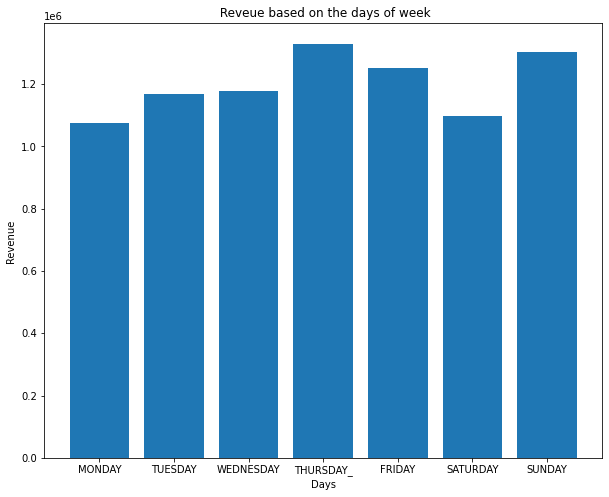

In [ ]:
y = A
x = ['MONDAY', 'TUESDAY', 'WEDNESDAY',
       'THURSDAY_', 'FRIDAY', 'SATURDAY',
       'SUNDAY']
plt.figure(figsize=(10,8))
plt.bar(x, y )
plt.xlabel("Days")
plt.ylabel("Revenue ")
plt.title(' Reveue based on the days of week')

**We can see mondays and saturdays have lowest revenues , we can create some weekly sale on this days to generate more revnue**

In [ ]:
Attention.CustomerID

2399         8
2426        71
2576        47
2589        30
2625        52
         ...  
4995    173946
4996    173987
4997    174004
4998    174038
4999    200783
Name: CustomerID, Length: 3080, dtype: int64

In [ ]:
Potential_customers.CustomerID

1899        94
1929         6
1968        92
1987        19
2060        58
         ...  
1672      9651
1673     17148
1674     19685
1675     76063
1676    114829
Name: CustomerID, Length: 1536, dtype: int64

In [ ]:
Champions.CustomerID

0         22
1         29
2         83
3         95
1030      41
        ... 
1554     939
1555     994
1556    1233
1557    1563
1558    1876
Name: CustomerID, Length: 384, dtype: int64